In [22]:
# Class dependencies
from model_sam import OrigamiNetwork
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import pickle


# Other analysis libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_digits

In [23]:
# import small digits dataset

digits = load_digits()
X = digits.data
y = digits.target

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# set up the model
model = OrigamiNetwork(layers=0, epochs=1000, optimizer='sgd',learning_rate=0.001)
model.fit(X_train, y_train)

# get the predictions
y_hat = model.predict(X_test)
print(accuracy_score(y_test, y_hat))


Epoch 1000/1000: 100%|██████████| 1000/1000 [00:01<00:00, 589.55it/s]


0.9666666666666667


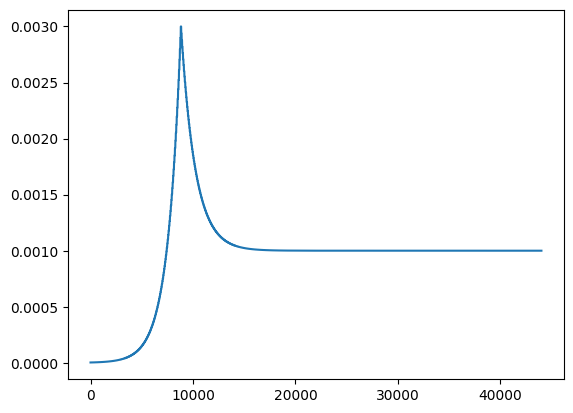

In [24]:
plt.plot(model.learning_rate_history)

In [25]:
n = 100
batch_size = 15

def get_batches(n, batch_size):
    indices = np.arange(n)
    print(np.sum(indices))
    print("begin")
    np.random.shuffle(indices)
    num_batches = n // batch_size

    # Loop through the different batches and get the batches
    batches = [indices[i*batch_size:(i+1)*batch_size].tolist() for i in range(num_batches)]

    # Handle the remaining points
    remaining_points = indices[num_batches*batch_size:]
    counter = len(remaining_points)
    i = 0

    # Fill the remaining points into the batches
    while counter > 0:
        batches[i % len(batches)].append(remaining_points[i])
        i += 1
        counter -= 1

    # Return the batches
    return batches


batches = get_batches(n, batch_size)
total = 0
for batch in batches:
    print(batch)
    print(len(batch))
    print()
    total += np.sum(batch)
    
print(total)


def randomize_batches(self):
    """
    Randomize the batches for stochastic gradient descent
    Parameters:
        None
    Returns:
        batches (list) - A list of batches of indices for training
    """
    # Get randomized indices and calculate the number of batches
    indices = np.arange(self.n)
    np.random.shuffle(indices)
    num_batches = self.n // self.batch_size

    # Loop through the different batches and get the batches
    batches = [indices[i*self.batch_size:(i+1)*self.batch_size].tolist() for i in range(num_batches)]

    # Handle the remaining points
    remaining_points = indices[num_batches*self.batch_size:]
    counter = len(remaining_points)
    i = 0

    # Fill the remaining points into the batches
    while counter > 0:
        batches[i % len(batches)].append(remaining_points[i])
        i += 1
        counter -= 1

    # Return the batches
    return batches

4950
begin
[16, 9, 88, 39, 24, 60, 32, 91, 0, 37, 96, 92, 77, 54, 57, 20, 44]
17

[90, 81, 95, 97, 71, 84, 94, 70, 26, 61, 1, 27, 36, 45, 42, 53, 33]
17

[21, 46, 3, 56, 12, 28, 29, 2, 99, 18, 89, 65, 35, 49, 23, 58, 41]
17

[83, 17, 72, 63, 55, 11, 82, 5, 15, 67, 69, 19, 25, 64, 73, 52, 51]
17

[68, 38, 10, 75, 79, 13, 30, 6, 22, 4, 80, 7, 47, 74, 85, 86]
16

[98, 43, 59, 76, 31, 50, 87, 34, 66, 14, 78, 40, 93, 8, 62, 48]
16

4950
